# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
! pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#openWeatherMap API Key
api_keys = api_key
#URL for WeatherMap API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
units = 'imperial'
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
#creat empty list to append API data into lists
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:
    print(f"Processing city #{record} | {city}")
    record += 1
    query_url = f"{url}&units={units}&q={city}"
    print(query_url)
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try:
        response = requests.get(query_url).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    

Beginning Data Retrieval
-------------------------------
Processing city #1 | saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&units=imperial&q=saleaula
City not found. Skipping...
Processing city #2 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&units=imperial&q=ushuaia
Processing Record 3 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&q=ushuaia
Processing city #4 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&units=imperial&q=saskylakh
Processing Record 5 | Saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&q=saskylakh
Processing city #6 | katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&units=imperial&q=katsuura
P

Processing city #55 | takapau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&units=imperial&q=takapau
Processing Record 56 | Takapau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&q=takapau
Processing city #57 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&units=imperial&q=castro
Processing Record 58 | Castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&q=castro
Processing city #59 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&units=imperial&q=hilo
Processing Record 60 | Hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&q=hilo
Processing city #61 | santa catarina de tepehuanes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f34

Processing city #110 | carutapera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&units=imperial&q=carutapera
Processing Record 111 | Carutapera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&q=carutapera
Processing city #112 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&units=imperial&q=sentyabrskiy
City not found. Skipping...
Processing city #113 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&units=imperial&q=arraial do cabo
Processing Record 114 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&q=arraial do cabo
Processing city #115 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&units=imperial&q=bengkulu
Ci

Processing city #164 | thilogne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&units=imperial&q=thilogne
City not found. Skipping...
Processing city #165 | lyuban
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&units=imperial&q=lyuban
Processing Record 166 | Lyuban
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&q=lyuban
Processing city #167 | porto torres
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&units=imperial&q=porto torres
Processing Record 168 | Porto Torres
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&q=porto torres
Processing city #169 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&units=imperial&q=bredasdorp
Processing Record 170 | Bredasdorp

Processing city #217 | beruwala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&units=imperial&q=beruwala
Processing Record 218 | Beruwala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&q=beruwala
Processing city #219 | srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&units=imperial&q=srednekolymsk
Processing Record 220 | Srednekolymsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&q=srednekolymsk
Processing city #221 | hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&units=imperial&q=hambantota
Processing Record 222 | Hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&q=hambantota
Processing city #223 | bambous virieux
http://api.openweathe

Processing city #270 | chagda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&units=imperial&q=chagda
City not found. Skipping...
Processing city #271 | rafaela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&units=imperial&q=rafaela
Processing Record 272 | Rafaela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&q=rafaela
Processing city #273 | nisia floresta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&units=imperial&q=nisia floresta
Processing Record 274 | Nisia Floresta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&q=nisia floresta
Processing city #275 | carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&units=imperial&q=carnarvon
Processing Record 276 | Carn

Processing city #323 | coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&units=imperial&q=coquimbo
Processing Record 324 | Coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&q=coquimbo
Processing city #325 | mount gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&units=imperial&q=mount gambier
Processing Record 326 | Mount Gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&q=mount gambier
Processing city #327 | antalaha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&units=imperial&q=antalaha
Processing Record 328 | Antalaha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3480735349a126f72d784c4ceb32919&q=antalaha
Processing city #329 | xacmaz
http://api.openweathermap.org/data/2.5

In [16]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()



City          167
Cloudiness    167
Country       167
Date          167
Humidity      167
Lat           167
Lng           167
Max Temp      167
Wind Speed    167
dtype: int64

In [21]:
# Save data frame to CSV
weather_data.to_csv('Output_CSV/weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,20,AR,1563643278,59,-54.81,-68.31,37.4,3.36
1,Saskylakh,62,RU,1563643279,69,71.97,114.09,59.2,5.99
2,Katsuura,75,JP,1563643280,88,33.93,134.50,80.6,17.22
3,Ribeira Grande,40,PT,1563643281,83,38.52,-28.70,77.0,5.82
4,Kununurra,16,AU,1563643282,77,-15.77,128.74,60.8,1.68


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

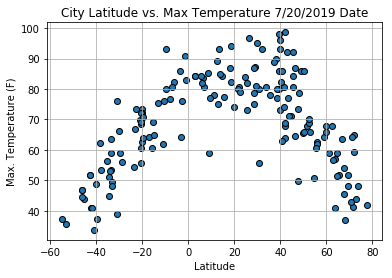

In [37]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", edgecolor="black")
# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature 7/20/2019 Date")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

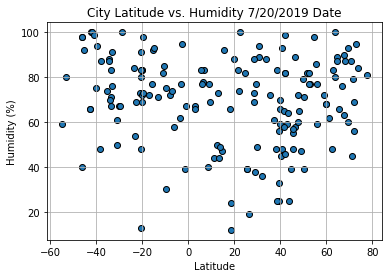

In [38]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity 7/20/2019 Date")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

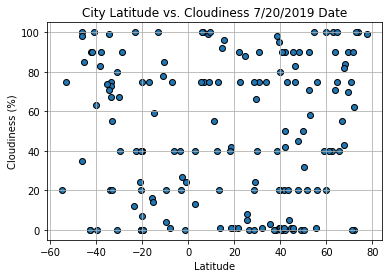

In [39]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness 7/20/2019 Date")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

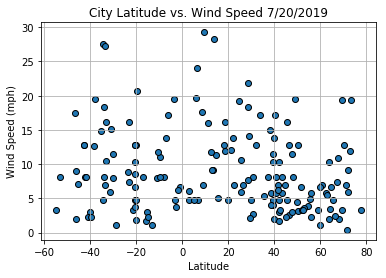

In [40]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", edgecolor ="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed 7/20/2019")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

Trends Observations:
#As we can see, in general, temperature is getting to its highest lavel as we go closer to equator.
#While humidity and cloudness dont show a strong corellation to latitude.
#lastly, wind speed is decreasing going forward to latitude.
